In [ ]:
import pandas as pd
import numpy as np
import json

In [3]:
# Go to the root folder
import sys
sys.path.append("..")

# Data Loading

In [4]:
from src.processing import load_processed_data

df = load_processed_data()
df.head()

,source_code,tags,full_description
src_uid,,,
bb3fc45f903588baf131016bea175a9f,# calculate convex of polygon v.\n# v is list ...,[geometry],Problem Description:\nIahub has drawn a set of...
7d6faccc88a6839822fa0c0ec8c00251,s = input().strip();N = len(s)\nif len(s) == 1...,[strings],Problem Description:\nSome time ago Lesha foun...
891fabbb6ee8a4969b6f413120f672a8,"n = int(input())\nfor _ in range(n):\n k,x = m...","[number theory, math]",Problem Description:\nToday at the lesson of m...
9d46ae53e6dc8dc54f732ec93a82ded3,temp = list(input())\nm = int(input())\ntrans ...,"[math, strings]",Problem Description:\nPasha got a very beautif...
0e0f30521f9f5eb5cff2549cd391da3c,"N, B, E = input(), [], 0\nfor a in map(int, ra...",[math],Problem Description:\nYou are given an array $...


In [5]:
def get_labels(df):
    """ Return 8-length binary vectors representing the labels """

    focus_tags = ['math', 'graphs', 'strings', 'number theory',
              'trees', 'geometry', 'games', 'probabilities']

    
    def encode_tags(tag_list):
        return [1 if t in tag_list else 0 for t in focus_tags]

    labels_vector = df["tags"].apply(encode_tags)

    return np.vstack(labels_vector.values)


# To be able to decode the labels later
label_mapping = {
    'math': 0,
    'graphs': 1,
    'strings': 2,
    'number theory': 3,
    'trees': 4,
    'geometry': 5,
    'games': 6,
    'probabilities': 7
}

In [6]:
Y = get_labels(df)
Y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], shape=(2676, 8))

In [7]:
X_descriptions = df["full_description"].values
X_code = df["source_code"].values

In [ ]:
# We just split the data into code and description features
# The idea is that this 2 strings are really different in nature
# So training a model on both at the same time may not be optimal
# We may rather train 2 different models and then combine their predictions

# With Description

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_desc_train, X_desc_test, Y_train, Y_test = train_test_split(
    X_descriptions, Y, test_size=0.2, random_state=42
)

In [8]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000
                                     , stop_words='english')

X_desc_train_tfidf = tfidf_vectorizer.fit_transform(X_desc_train)
X_desc_test_tfidf = tfidf_vectorizer.transform(X_desc_test)

In [9]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr_model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
lr_model.fit(X_desc_train_tfidf, Y_train)

,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [24]:
y_pred = lr_model.predict(X_desc_test_tfidf)
y_pred

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(536, 8))

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, target_names=label_mapping.keys()))

               precision    recall  f1-score   support

         math       0.77      0.86      0.82       281
       graphs       0.80      0.32      0.45       110
      strings       0.89      0.73      0.80        90
number theory       0.80      0.16      0.26        76
        trees       0.95      0.58      0.72        60
     geometry       0.60      0.09      0.16        33
        games       0.86      0.27      0.41        22
probabilities       0.00      0.00      0.00        10

    micro avg       0.81      0.59      0.68       682
    macro avg       0.71      0.38      0.45       682
 weighted avg       0.79      0.59      0.63       682
  samples avg       0.70      0.62      0.64       682



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [26]:
# Bad results for minority class
# To get more robust result, we can use cross validation
# To do this, we need a pipeline including the processing (TF-IDF + Model)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

In [28]:
# Cross Validation
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(pipeline, X_descriptions, Y, cv=5)

In [29]:
# Report
print(classification_report(Y, predictions, target_names=label_mapping.keys()))

               precision    recall  f1-score   support

         math       0.77      0.84      0.80      1407
       graphs       0.79      0.33      0.47       541
      strings       0.87      0.65      0.75       422
number theory       0.84      0.16      0.27       350
        trees       0.90      0.46      0.61       324
     geometry       0.89      0.19      0.32       166
        games       0.92      0.22      0.35       105
probabilities       0.00      0.00      0.00        92

    micro avg       0.80      0.56      0.66      3407
    macro avg       0.75      0.36      0.45      3407
 weighted avg       0.79      0.56      0.61      3407
  samples avg       0.67      0.60      0.62      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [35]:
# Other models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score


# Test both
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(SVC()))
])

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

pred_svc = cross_val_predict(pipeline_svc, X_descriptions, Y, cv=5)
print('Finshed SVC pipeline')
    
pred_rf = cross_val_predict(pipeline_rf, X_descriptions, Y, cv=5)
pred_lr = predictions  # from previous logistic regression

micro_f1_svc = f1_score(Y, pred_svc, average='micro')
micro_f1_rf = f1_score(Y, pred_rf, average='micro')

macro_f1_svc = f1_score(Y, pred_svc, average='macro')
macro_f1_rf = f1_score(Y, pred_rf, average='macro')

macro_f1_lr = f1_score(Y, pred_lr, average='macro')
micro_f1_lr = f1_score(Y, pred_lr, average='micro')

print(f"SVC Micro F1: {micro_f1_svc}, Macro F1: {macro_f1_svc}")
print(f"RF Micro F1: {micro_f1_rf}, Macro F1: {macro_f1_rf}")
print(f"LR Micro F1: {micro_f1_lr}, Macro F1: {macro_f1_lr}")


Finshed SVC pipeline
SVC Micro F1: 0.6750169262017603, Macro F1: 0.5125476995380298
RF Micro F1: 0.6965725806451613, Macro F1: 0.5595898490472004
LR Micro F1: 0.6565307532826538, Macro F1: 0.4456389349430261


In [55]:
# RF outperforms both SVC and Logistic Regression in this case
# On both metrics

# Considering Class Imbalance, we could do some over/under-sampling
# But it's quite complicated with TF-IDF vectors
# We can rather use class_weight='balanced' in our models 

# We test for linear and logistic regression

pipeline_lr_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='liblinear')))
])

pipeline_rf_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(RandomForestClassifier(class_weight='balanced')))
])

pipeline_svm_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(SVC(class_weight='balanced')))
])

pred_lr_weighted = cross_val_predict(pipeline_lr_weighted, X_descriptions, Y, cv=5)
micro_f1_lr_weighted = f1_score(Y, pred_lr_weighted, average='micro')
macro_f1_lr_weighted = f1_score(Y, pred_lr_weighted, average='macro')

pred_rf_weighted = cross_val_predict(pipeline_rf_weighted, X_descriptions, Y, cv=5)
micro_f1_rf_weighted = f1_score(Y, pred_rf_weighted, average='micro')
macro_f1_rf_weighted = f1_score(Y, pred_rf_weighted, average='macro')

pred_svm_weighted = cross_val_predict(pipeline_svm_weighted, X_descriptions, Y, cv=5)
micro_f1_svm_weighted = f1_score(Y, pred_svm_weighted, average='micro')
macro_f1_svm_weighted = f1_score(Y, pred_svm_weighted, average='macro')

print(f"LR + Weighted Loss Micro F1: {micro_f1_lr_weighted}, Macro F1: {macro_f1_lr_weighted}")
print(f"RF + Weighted Loss Micro F1: {micro_f1_rf_weighted}, Macro F1: {macro_f1_rf_weighted}")
print(f"SVM + Weighted Loss Micro F1: {micro_f1_svm_weighted}, Macro F1: {macro_f1_svm_weighted}")

LR + Weighted Loss Micro F1: 0.7195899141036298, Macro F1: 0.6809134185647536
RF + Weighted Loss Micro F1: 0.6720494760350455, Macro F1: 0.4675610586771377
SVM + Weighted Loss Micro F1: 0.7115021998742929, Macro F1: 0.6182976028536358


In [56]:
# LR + Weighted Loss outperforms all previous models with our metrics

# Just to test we can also try withtout removing stop words
pipeline_lr_weighted_nostop = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words=None)),
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='liblinear')))
])

pred_lr_weighted_nostop = cross_val_predict(pipeline_lr_weighted_nostop, X_descriptions, Y, cv=5)
micro_f1_lr_weighted_nostop = f1_score(Y, pred_lr_weighted_nostop, average='micro')
macro_f1_lr_weighted_nostop = f1_score(Y, pred_lr_weighted_nostop, average='macro')
print(f"LR + Weighted Loss + No Stop Words Micro F1: {micro_f1_lr_weighted_nostop}, Macro F1: {macro_f1_lr_weighted_nostop}")

LR + Weighted Loss + No Stop Words Micro F1: 0.7232216994187656, Macro F1: 0.6865464076992303


In [ ]:
# Results are veyr similar

# So our best model for now is the logistic regression with class_weight='balanced' and without removing stop words

In [64]:
# Let's try also some boosting models

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


pipeline_xgb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(XGBClassifier(use_label_encoder=False)))
])

pipeline_lgbm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(verbose=-1)))
])



In [61]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')

# To avoid a warning on xgboost while using OnveVsRestClassifier

In [62]:
pred_xgb = cross_val_predict(pipeline_xgb, X_descriptions, Y, cv=5)
micro_f1_xgb = f1_score(Y, pred_xgb, average='micro')
macro_f1_xgb = f1_score(Y, pred_xgb, average='macro')
print(f"XGB Micro F1: {micro_f1_xgb}, Macro F1: {macro_f1_xgb}")

XGB Micro F1: 0.7210734017363851, Macro F1: 0.6835770104692758


In [65]:
pred_lgbm = cross_val_predict(pipeline_lgbm, X_descriptions, Y, cv=5)
micro_f1_lgbm = f1_score(Y, pred_lgbm, average='micro')
macro_f1_lgbm = f1_score(Y, pred_lgbm, average='macro')
print(f"LGBM Micro F1: {micro_f1_lgbm}, Macro F1: {macro_f1_lgbm}")

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

LGBM Micro F1: 0.7275043796782927, Macro F1: 0.6946220354762296


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# The boosting models got very good results, we keep LGBM because it get a little better results than XGB (on macro F1)

In [74]:
# We can also try lgbm but with balanced class weight

pipeline_lgbm_balanced = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(class_weight='balanced', verbose=-1)))
])

pred_lgbm_balanced = cross_val_predict(pipeline_lgbm_balanced, X_descriptions, Y, cv=5)
micro_f1_lgbm_balanced = f1_score(Y, pred_lgbm_balanced, average='micro')
macro_f1_lgbm_balanced = f1_score(Y, pred_lgbm_balanced, average='macro')
print(f"LGBM + Balanced Micro F1: {micro_f1_lgbm_balanced}, Macro F1: {macro_f1_lgbm_balanced}")

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

LGBM + Balanced Micro F1: 0.7415488629379225, Macro F1: 0.7228379900387323


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# It really imrpoved both metrics

In [77]:
# LightGBM seems to perform very well
# LightGBM is vry sensitive to hyperparameters, we could try to tune them

import optuna

def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }
    
    pipeline_lgbm_tuned = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
        ('clf', OneVsRestClassifier(LGBMClassifier(**param, verbose=-1)))
    ])
    
    pred_lgbm_tuned = cross_val_predict(pipeline_lgbm_tuned, X_descriptions, Y, cv=3)
    macro_f1_lgbm_tuned = f1_score(Y, pred_lgbm_tuned, average='macro')
    
    return macro_f1_lgbm_tuned

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Best hyperparameters: ", study.best_params)
print("Best Macro F1: ", study.best_value)

[I 2025-12-01 08:19:12,833] A new study created in memory with name: no-name-68402a15-d88a-42ee-91c3-39bec393201e
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-12-01 08:19:21,219] Trial 0 finished with value: 0.7091852420044018 and parameters: {'num_leaves': 137, 'max_d

Best hyperparameters:  {'num_leaves': 90, 'max_depth': 5, 'learning_rate': 0.08526470168129627, 'n_estimators': 204, 'class_weight': 'balanced'}
Best Macro F1:  0.7168526147727685


In [78]:
# Best model :

best_params = study.best_params

pipeline_lgbm_best = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params, verbose=-1)))
])

pred_lgbm_best = cross_val_predict(pipeline_lgbm_best, X_descriptions, Y, cv=5)

# Reports
print(classification_report(Y, pred_lgbm_best, target_names=label_mapping.keys()))


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

               precision    recall  f1-score   support

         math       0.78      0.81      0.79      1407
       graphs       0.69      0.64      0.66       541
      strings       0.82      0.85      0.83       422
number theory       0.59      0.51      0.55       350
        trees       0.80      0.69      0.74       324
     geometry       0.72      0.69      0.71       166
        games       0.87      0.79      0.83       105
probabilities       0.86      0.71      0.77        92

    micro avg       0.75      0.74      0.75      3407
    macro avg       0.76      0.71      0.74      3407
 weighted avg       0.75      0.74      0.74      3407
  samples avg       0.75      0.77      0.73      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# We finally achieve some satisfying results with LGBM
# We get good performance overall and also on minority classes

# On Code

In [46]:
# We do the same for code features

# We can test our lr and rf models (weighted and unweighted)

pipeline_lr_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words=None)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

pipeline_rf_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words=None)),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

pred_lr_code = cross_val_predict(pipeline_lr_code, X_code, Y, cv=5)
pred_rf_code = cross_val_predict(pipeline_rf_code, X_code, Y, cv=5)

micro_f1_lr_code = f1_score(Y, pred_lr_code, average='micro')
macro_f1_lr_code = f1_score(Y, pred_lr_code, average='macro')

micro_f1_rf_code = f1_score(Y, pred_rf_code, average='micro')
macro_f1_rf_code = f1_score(Y, pred_rf_code, average='macro')

print(f"LR Code Micro F1: {micro_f1_lr_code}, Macro F1: {macro_f1_lr_code}")
print(f"RF Code Micro F1: {micro_f1_rf_code}, Macro F1: {macro_f1_rf_code}")

LR Code Micro F1: 0.5028702640642939, Macro F1: 0.21507951992091337
RF Code Micro F1: 0.5054737636844092, Macro F1: 0.24024474655895406


In [47]:
# Results are very low
# We should probably consider remocing stopwords (especially for code)
pipeline_lr_code_stop = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

pred_lr_code_stop = cross_val_predict(pipeline_lr_code_stop, X_code, Y, cv=5)
micro_f1_lr_code_stop = f1_score(Y, pred_lr_code_stop, average='micro')
macro_f1_lr_code_stop = f1_score(Y, pred_lr_code_stop, average='macro')
print(f"LR Code + Stop Words Micro F1: {micro_f1_lr_code_stop}, Macro F1: {macro_f1_lr_code_stop}")

pipeline_rf_code_stop = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

pred_rf_code_stop = cross_val_predict(pipeline_rf_code_stop, X_code, Y, cv=5)
micro_f1_rf_code_stop = f1_score(Y, pred_rf_code_stop, average='micro')
macro_f1_rf_code_stop = f1_score(Y, pred_rf_code_stop, average='macro')
print(f"RF Code + Stop Words Micro F1: {micro_f1_rf_code_stop}, Macro F1: {macro_f1_rf_code_stop}")

LR Code + Stop Words Micro F1: 0.5005731753916699, Macro F1: 0.21664608211630537
RF Code + Stop Words Micro F1: 0.5187534987870871, Macro F1: 0.2575917938307911


In [48]:
# Results are very similar, let's see with weighted loss
pipeline_lr_code_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='liblinear')))
])

pipeline_rf_code_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(RandomForestClassifier(class_weight='balanced')))
])

pred_lr_code_weighted = cross_val_predict(pipeline_lr_code_weighted, X_code, Y, cv=5)
micro_f1_lr_code_weighted = f1_score(Y, pred_lr_code_weighted, average='micro')
macro_f1_lr_code_weighted = f1_score(Y, pred_lr_code_weighted, average='macro')

pred_rf_code_weighted = cross_val_predict(pipeline_rf_code_weighted, X_code, Y, cv=5)
micro_f1_rf_code_weighted = f1_score(Y, pred_rf_code_weighted, average='micro')
macro_f1_rf_code_weighted = f1_score(Y, pred_rf_code_weighted, average='macro')

print(f"LR + Weighted Loss Code Micro F1: {micro_f1_lr_code_weighted}, Macro F1: {macro_f1_lr_code_weighted}")
print(f"RF + Weighted Loss Code Micro F1: {micro_f1_rf_code_weighted}, Macro F1: {macro_f1_rf_code_weighted}")

LR + Weighted Loss Code Micro F1: 0.5578442803471952, Macro F1: 0.43865402453583957
RF + Weighted Loss Code Micro F1: 0.5047116471918582, Macro F1: 0.22135642438189432


In [71]:
# For logistic regression, it really improved the result

# Just like for the description, we could try boosting models

pipeline_xgb_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(XGBClassifier(use_label_encoder=False)))
])

pred_xgb_code = cross_val_predict(pipeline_xgb_code, X_code, Y, cv=5)
micro_f1_xgb_code = f1_score(Y, pred_xgb_code, average='micro')
macro_f1_xgb_code = f1_score(Y, pred_xgb_code, average='macro')
print(f"XGB Code Micro F1: {micro_f1_xgb_code}, Macro F1: {macro_f1_xgb_code}")

pipeline_lgbm_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier()))
])

pred_lgbm_code = cross_val_predict(pipeline_lgbm_code, X_code, Y, cv=5)
micro_f1_lgbm_code = f1_score(Y, pred_lgbm_code, average='micro')
macro_f1_lgbm_code = f1_score(Y, pred_lgbm_code, average='macro')
print(f"LGBM Code Micro F1: {micro_f1_lgbm_code}, Macro F1: {macro_f1_lgbm_code}")

XGB Code Micro F1: 0.5675033921302578, Macro F1: 0.37141735538680953


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

LGBM Code Micro F1: 0.5836748633879781, Macro F1: 0.36455102534995426


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [73]:
# Here again LGBM outperforms XGB (not by far)
# We can try with class_weight='balanced'

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y.argmax(axis=1)), y=Y.argmax(axis=1))
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights)) }

pipeline_lgbm_code_weighted = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(class_weight='balanced')))
])

pred_lgbm_code_weighted = cross_val_predict(pipeline_lgbm_code_weighted, X_code, Y, cv=5)
micro_f1_lgbm_code_weighted = f1_score(Y, pred_lgbm_code_weighted, average='micro')
macro_f1_lgbm_code_weighted = f1_score(Y, pred_lgbm_code_weighted, average='macro')
print(f"LGBM + Weighted Loss Code Micro F1: {micro_f1_lgbm_code_weighted}, Macro F1: {macro_f1_lgbm_code_weighted}")

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

LGBM + Weighted Loss Code Micro F1: 0.5900250941028858, Macro F1: 0.4197659863896131


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [79]:
# It seems that we got a very good model for code features too with LGBM
# We can try again to tune hyperparameters with optuna

def objective_code(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }
    
    pipeline_lgbm_tuned_code = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
        ('clf', OneVsRestClassifier(LGBMClassifier(**param)))
    ])
    
    pred_lgbm_tuned_code = cross_val_predict(pipeline_lgbm_tuned_code, X_code, Y, cv=3)
    macro_f1_lgbm_tuned_code = f1_score(Y, pred_lgbm_tuned_code, average='macro')
    
    return macro_f1_lgbm_tuned_code


study_code = optuna.create_study(direction='maximize')
study_code.optimize(objective_code, n_trials=10)

print("Best hyperparameters for code model: ", study_code.best_params)
print("Best Macro F1 for code model: ", study_code.best_value)

[I 2025-12-01 08:29:42,462] A new study created in memory with name: no-name-1c9813c3-a89e-479d-ad35-fe785c49de41
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-12-01 08:29:45,810] Trial 0 finished with value: 0.41202923029052324 and parameters: {'num_leaves': 38, 'max_d

Best hyperparameters for code model:  {'num_leaves': 130, 'max_depth': 24, 'learning_rate': 0.026440575728330206, 'n_estimators': 121, 'class_weight': 'balanced'}
Best Macro F1 for code model:  0.4149827100040189


In [80]:
# Best model
best_params_code = study_code.best_params
pipeline_lgbm_best_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params_code)))
])

pred_lgbm_best_code = cross_val_predict(pipeline_lgbm_best_code, X_code, Y, cv=5)
# Reports
print(classification_report(Y, pred_lgbm_best_code, target_names=label_mapping.keys()))

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

               precision    recall  f1-score   support

         math       0.70      0.74      0.72      1407
       graphs       0.55      0.55      0.55       541
      strings       0.61      0.61      0.61       422
number theory       0.40      0.37      0.38       350
        trees       0.48      0.48      0.48       324
     geometry       0.41      0.33      0.37       166
        games       0.10      0.07      0.08       105
probabilities       0.25      0.20      0.22        92

    micro avg       0.58      0.57      0.58      3407
    macro avg       0.44      0.42      0.43      3407
 weighted avg       0.57      0.57      0.57      3407
  samples avg       0.55      0.60      0.55      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# Results are largely lower than with description features
# But it still can be usefull to combine both features later

# Combining

In [82]:
# We can try to combine both description and code models
# And then build a meta-classifier on top of their predictions

# To do this, we use the privous model, we get the probabilities (not just the predictions)
# And then do the average of both probabilities to get final predictions

best_params_desc = study.best_params # Just to be clear

# Get probabilities from both models
pipeline_desc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params_desc)))
])


pipeline_code = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params_code)))
])

proba_desc = cross_val_predict(pipeline_desc, X_descriptions, Y, cv=5, method='predict_proba')
proba_code = cross_val_predict(pipeline_code, X_code, Y, cv=5, method='predict_proba')

# Average probabilities
proba_avg = (proba_desc + proba_code) / 2

# Get final predictions
final_predictions = (proba_avg >= 0.5).astype(int)

micro_f1_final = f1_score(Y, final_predictions, average='micro')
macro_f1_final = f1_score(Y, final_predictions, average='macro')
print(f"Combined Model Micro F1: {micro_f1_final}, Macro F1: {macro_f1_final}")

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

Combined Model Micro F1: 0.745085995085995, Macro F1: 0.7149386353302911


/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [83]:
# Just to compare let's see the resultas of description-only model again
print(classification_report(Y, pred_lgbm_best, target_names=label_mapping.keys()))

               precision    recall  f1-score   support

         math       0.78      0.81      0.79      1407
       graphs       0.69      0.64      0.66       541
      strings       0.82      0.85      0.83       422
number theory       0.59      0.51      0.55       350
        trees       0.80      0.69      0.74       324
     geometry       0.72      0.69      0.71       166
        games       0.87      0.79      0.83       105
probabilities       0.86      0.71      0.77        92

    micro avg       0.75      0.74      0.75      3407
    macro avg       0.76      0.71      0.74      3407
 weighted avg       0.75      0.74      0.74      3407
  samples avg       0.75      0.77      0.73      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [84]:
# Results are lower than description-only model
# We should maybe give more weight to description model (considering its better performance)

# We want to find the best weights to optimize the f1 score
# We choose to optimize the micro f1 score

best_micro_f1 = 0

for w in np.arange(0, 1.01, 0.01):
    proba_combined = w * proba_desc + (1 - w) * proba_code
    predictions_combined = (proba_combined >= 0.5).astype(int)
    micro_f1_combined = f1_score(Y, predictions_combined, average='micro')
    
    if micro_f1_combined > best_micro_f1:
        best_micro_f1 = micro_f1_combined
        best_weight = w

print(f"Best Weight for Description: {best_weight}, Best Micro F1: {best_micro_f1}")

Best Weight for Description: 0.64, Best Micro F1: 0.7585686244904122


In [85]:
# So using the best weight, we can get the final predictions
proba_best = best_weight * proba_desc + (1 - best_weight) * proba_code
final_predictions_best = (proba_best >= 0.5).astype(int)

# Classification Report
print(classification_report(Y, final_predictions_best, target_names=label_mapping.keys()))

               precision    recall  f1-score   support

         math       0.78      0.83      0.80      1407
       graphs       0.72      0.63      0.67       541
      strings       0.83      0.86      0.84       422
number theory       0.70      0.50      0.58       350
        trees       0.82      0.68      0.75       324
     geometry       0.78      0.65      0.71       166
        games       0.90      0.79      0.84       105
probabilities       0.86      0.68      0.76        92

    micro avg       0.78      0.74      0.76      3407
    macro avg       0.80      0.70      0.74      3407
 weighted avg       0.78      0.74      0.75      3407
  samples avg       0.76      0.77      0.74      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# We improved a very little bit the results with combining model
# But actually the description-only model is quite similar in terms of metrics (and computation time obviously)

In [87]:
# Let's try to concatenate both features and train a single model
X_full = [desc + " " + code for desc, code in zip(X_descriptions, X_code)]

pipeline_full = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(class_weight='balanced')))
])

pred_full = cross_val_predict(pipeline_full, X_full, Y, cv=5)

print(classification_report(Y, pred_full, target_names=label_mapping.keys()))

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

               precision    recall  f1-score   support

         math       0.79      0.82      0.81      1407
       graphs       0.73      0.58      0.65       541
      strings       0.82      0.83      0.83       422
number theory       0.67      0.49      0.57       350
        trees       0.82      0.69      0.75       324
     geometry       0.77      0.61      0.68       166
        games       0.89      0.81      0.85       105
probabilities       0.86      0.68      0.76        92

    micro avg       0.78      0.72      0.75      3407
    macro avg       0.80      0.69      0.74      3407
 weighted avg       0.78      0.72      0.75      3407
  samples avg       0.76      0.75      0.74      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [88]:
# We achive very good results, let s oprimize it with optuna like we did before

def objective_full(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }
    
    pipeline_lgbm_tuned_full = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
        ('clf', OneVsRestClassifier(LGBMClassifier(**param)))
    ])
    
    pred_lgbm_tuned_full = cross_val_predict(pipeline_lgbm_tuned_full, X_full, Y, cv=3)
    macro_f1_lgbm_tuned_full = f1_score(Y, pred_lgbm_tuned_full, average='macro')
    
    return macro_f1_lgbm_tuned_full

study_full = optuna.create_study(direction='maximize')
study_full.optimize(objective_full, n_trials=20)

print("Best hyperparameters for full model: ", study_full.best_params)
print("Best Macro F1 for full model: ", study_full.best_value)

[I 2025-12-01 08:38:59,282] A new study created in memory with name: no-name-8effe197-5c5f-4be2-9152-39ea6a879e58
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-12-01 08:39:22,042] Trial 0 finished with value: 0.7134143961156596 and parameters: {'num_leaves': 69, 'max_de

Best hyperparameters for full model:  {'num_leaves': 150, 'max_depth': 27, 'learning_rate': 0.02341509850272208, 'n_estimators': 299, 'class_weight': 'balanced'}
Best Macro F1 for full model:  0.7322625169505292


In [89]:
# Test best model
best_params_full = study_full.best_params
pipeline_lgbm_best_full = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params_full)))
])

pred_lgbm_best_full = cross_val_predict(pipeline_lgbm_best_full, X_full, Y, cv=5)

# Reports
print(classification_report(Y, pred_lgbm_best_full, target_names=label_mapping.keys()))

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature

               precision    recall  f1-score   support

         math       0.79      0.83      0.81      1407
       graphs       0.74      0.57      0.65       541
      strings       0.81      0.83      0.82       422
number theory       0.72      0.51      0.59       350
        trees       0.82      0.69      0.75       324
     geometry       0.73      0.62      0.67       166
        games       0.88      0.81      0.84       105
probabilities       0.81      0.71      0.76        92

    micro avg       0.78      0.73      0.75      3407
    macro avg       0.79      0.70      0.74      3407
 weighted avg       0.78      0.73      0.75      3407
  samples avg       0.76      0.76      0.74      3407



/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# Finally, the hyperparameter-tuned LGBM on concatenated features gives very sumilar results than description-only model
# To keep it simple, we can choose the combining model (just the 2 features concatenated) as our final model

# To be able to reuse it later, we save the final model
# First we fit it on the whole dataset (to benefit from all data)

pipeline_final = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', OneVsRestClassifier(LGBMClassifier(**best_params_full)))
])

pipeline_final.fit(X_full, Y)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [92]:
import joblib

joblib.dump(pipeline_final, '../models/tfidf_lgbm_full_model.joblib')

['../models/tfidf_lgbm_full_model.joblib']

# Interpretability

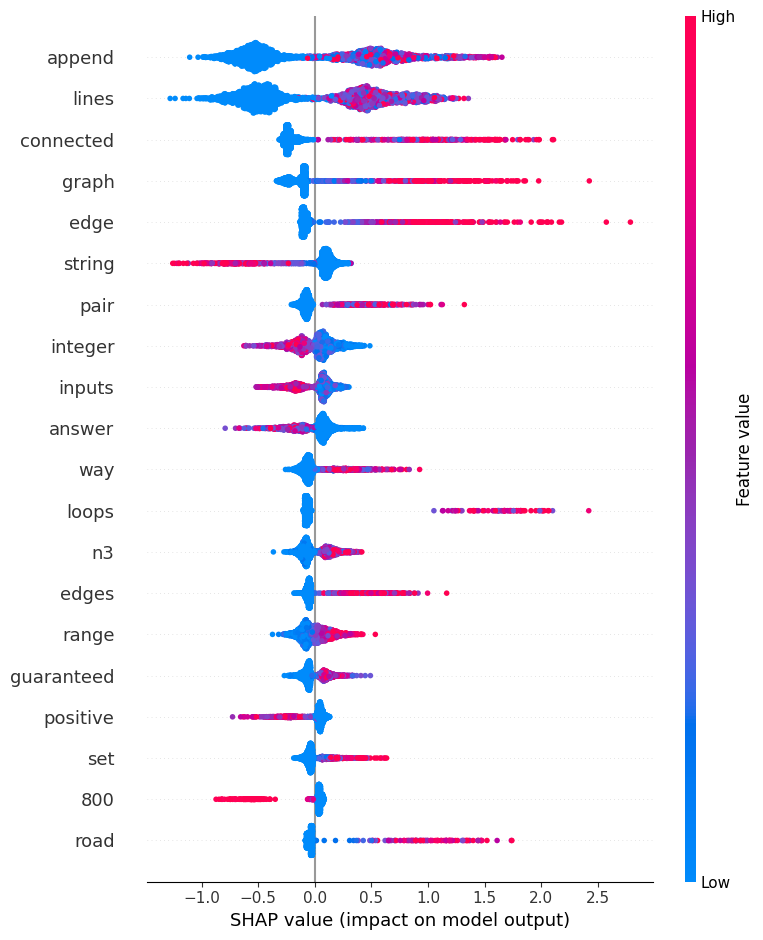

In [31]:
# One major benefit of using ML model (instead of deep learning) is the interpretability
# Even if lgbm is a quite complex model, we can still get feature importance
# Using library shap

import shap

# A very important detail is that in our case we actually have 8 models (one per class) because we used OneVsRestClassifier
# So we need to choose which model we want to explain
# We choose the 'graphs' class (index 1)

explainer = shap.Explainer(pipeline_final.named_steps['clf'].estimators_[1])
tfidf_features = pipeline_final.named_steps['tfidf'].get_feature_names_out()
shap_values = explainer(pipeline_final.named_steps['tfidf'].transform(X_full).toarray())
shap.summary_plot(shap_values, feature_names=tfidf_features)

In [ ]:
# Here we see the most import features (i.e. words) for the 'graphs' class
# A negative SHAP value means that the feature contributes to predicting the negative class (i.e. not 'graphs')
# While a positive SHAP value means that the feature contributes to predicting the positive class (i.e. 'graphs')

In [32]:
# Another really usefull usecase of SHAP is to explain individual predictions
# Let's take an example

index = 200  # Arbitrary index

print("True labels: ", Y[index])
print('Which means: ', [key for key, value in label_mapping.items() if Y[index][value] == 1])
print("Predicted labels: ", pipeline_final.predict([X_full[index]]))

print(X_full[index])

True labels:  [0 1 0 0 1 0 0 0]
Which means:  ['graphs', 'trees']
Predicted labels:  [[0 1 0 0 1 0 0 0]]
Problem Description:
There are n employees working in company "X" (let's number them from 1 to n for convenience). Initially the employees didn't have any relationships among each other. On each of m next days one of the following events took place:  either employee y became the boss of employee x (at that, employee x didn't have a boss before);  or employee x gets a packet of documents and signs them; then he gives the packet to his boss. The boss signs the documents and gives them to his boss and so on (the last person to sign the documents sends them to the archive);  or comes a request of type "determine whether employee x signs certain documents". Your task is to write a program that will, given the events, answer the queries of the described type. At that, it is guaranteed that throughout the whole working time the company didn't have cyclic dependencies.

Input Specification:

/Users/valentindugay/Desktop/CS/Stage/Projet ILLUIN/CodeClassification/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


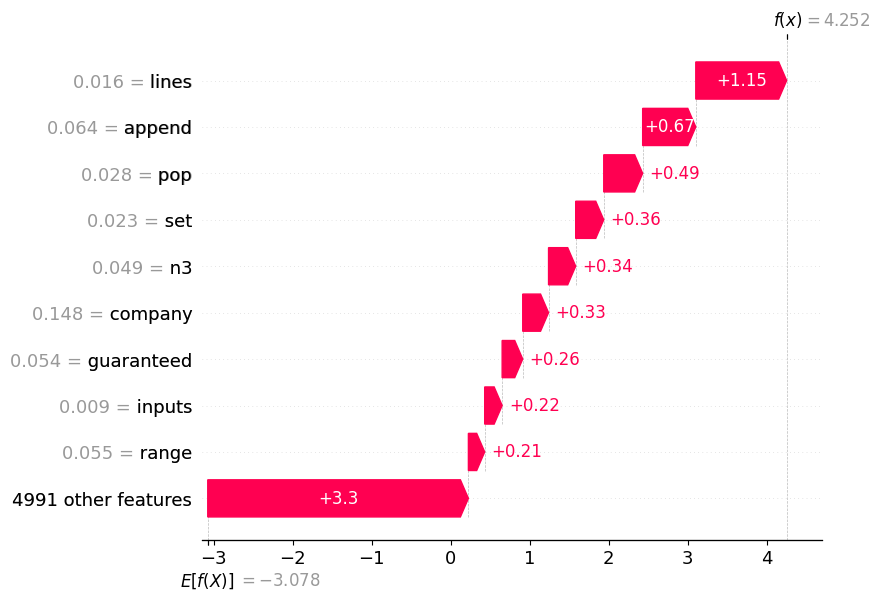

In [33]:
# We reuse the explainer of index 1 : class 'graphs'


# We can apply the explainer on this single example (and on the model that predicted 1)
shap_values_single = explainer(pipeline_final.named_steps['tfidf'].transform([X_full[index]]).toarray())
shap_values_single.feature_names = tfidf_features
shap.plots.waterfall(shap_values_single[0], max_display=10)

In [34]:
# There, for example, the word 'lines' contributed a lot to predict the 'graphs' class

In [ ]:
# This kinf of interpretability is really important in practice

# - It can help to build trust in the model
# - It can help to debug the model (by seeing if it relies on relevant features)